In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [267]:
df = pd.read_csv('201905-baywheels-tripdata.csv')

In [268]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988.0,Male,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998.0,Male,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967.0,Male,No


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


In [270]:
#Copy the dataset for future refrences
copy = df.copy()

In [271]:
#check wether there is any null in the dataset 
df.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

# Data Wrangle

## here the data have couple of a problems 
### - start time column not date 
### - end time column not date
### - why start_station_id is float ? we need to invistage more in this one
### - bike_id is int we will not have any computation on it we need to convert it to string 
### - member_birth_year is float we need to change it
### - member_gender we can convert it to catgeory if we wish
### - we have null values in birth year and gender seems some people sign up without specifiing their gender
### - we need to drop any null values

In [272]:
#drop any null values
df.dropna(inplace=True)

In [273]:
df.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year          False
member_gender              False
bike_share_for_all_trip    False
dtype: bool

In [274]:
#data stats 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,173679.000000,173679.000000,173679.000000,173679.000000,173679.000000,173679.000000,173679.000000,173679.000000,173679.000000
mean,751.560292,141.857191,37.763036,-122.345348,139.471686,37.763207,-122.344499,1966.784303,1984.382332
std,1592.848631,117.156633,0.113481,0.130330,116.708048,0.113311,0.129542,1138.239110,10.299051
min,61.000000,3.000000,37.311284,-122.453704,3.000000,37.311284,-122.453704,12.000000,1896.000000
25%,353.000000,44.000000,37.770030,-122.411738,43.000000,37.770407,-122.409851,1024.000000,1980.000000
50%,560.000000,102.000000,37.780526,-122.397086,99.000000,37.780955,-122.395526,1931.000000,1987.000000
75%,867.500000,240.000000,37.796471,-122.283093,238.000000,37.797280,-122.285633,2983.000000,1992.000000
max,84967.000000,427.000000,37.880222,-121.870099,427.000000,37.880222,-121.870099,7196.000000,2001.000000


In [275]:

df.shape

(173679, 16)

In [276]:
#convert the two columns to date so it can be easily minuplate
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time']= pd.to_datetime(df['end_time'])

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173679 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               173679 non-null int64
start_time                 173679 non-null datetime64[ns]
end_time                   173679 non-null datetime64[ns]
start_station_id           173679 non-null float64
start_station_name         173679 non-null object
start_station_latitude     173679 non-null float64
start_station_longitude    173679 non-null float64
end_station_id             173679 non-null float64
end_station_name           173679 non-null object
end_station_latitude       173679 non-null float64
end_station_longitude      173679 non-null float64
bike_id                    173679 non-null int64
user_type                  173679 non-null object
member_birth_year          173679 non-null float64
member_gender              173679 non-null object
bike_share_for_all_trip    173679 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [278]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988.0,Male,No
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998.0,Male,No
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967.0,Male,No


In [279]:
#convert the ids from float to string as it's the best datatype for this
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['member_birth_year'] = df['member_birth_year'].astype(str)

In [280]:
#Remove .0 as they are not needed they are added because the column was float
df['start_station_id'] = df['start_station_id'].apply(lambda x :x[:-2])
df['end_station_id'] = df['end_station_id'].apply(lambda x :x[:-2])

In [281]:
df['member_birth_year'] = df['member_birth_year'].apply(lambda x :x[:-2])

In [282]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No


In [283]:
#Remove .0 as they are not needed they are added because the column was float
df['bike_id'] = df['bike_id'].astype(str)

# Univariate Exploration

In [284]:
import numpy as np

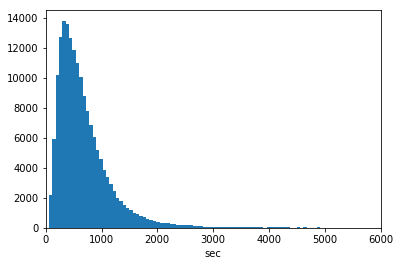

In [285]:
# we can say most rides between 0 sec and 5000
bins_size = 60
bins = np.arange(0,df['duration_sec'].max() +bins_size,bins_size )
plt.hist(df['duration_sec'],bins=bins)
plt.xlim(0,6000)
#plt.xscale('log')
plt.xlabel('sec')
plt.show()
# we also see there is a long tail for x axis we can do log scale

In [286]:
#to check the least duration
df['duration_sec'].min()

61

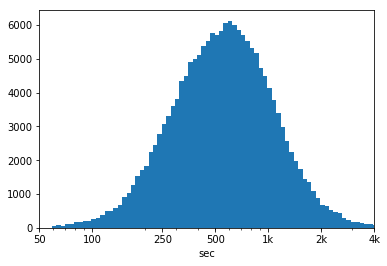

In [287]:
logbins_size = 0.025
bins = 10 ** np.arange(1.77,np.log10(df['duration_sec'].max())+logbins_size,logbins_size )
plt.hist(df['duration_sec'],bins=bins)

plt.xscale('log')
plt.xlabel('sec')
plt.xlim(50,4e2)
plt.xticks([50,1e2,250,500,1e3,2e3,4e3],[50,'100',250,500,'1k','2k','4k'])
#plt.xlim(50,2.5e2)
plt.show()


#### the duartion for rides looks like it have unimodal with single highest value it peaks roughly around 600 sec and from there it decresse  

In [288]:
#plt.hist(df['member_birth_year'])
#df.start_time.dt.day_name()
df.start_time.dt.hour.max()

23

### Question 1 : at what time the renting for bike hike ?

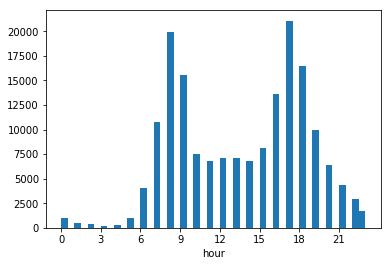

In [289]:
bins_size = 0.5
bins = np.arange(0,df.start_time.dt.hour.max()+0.5,bins_size)
plt.hist(df.start_time.dt.hour,bins=bins)
plt.xticks([0,3,6,9,12,15,18,21])
plt.xlabel('hour')
plt.show()

### we can see the renting for bikes spike around 8 am and 5 pm and that make sense because that when working hours starts and end

### Question 2 : does age have an impact on wether people will rent a bike or not

In [290]:
#function so we can make age group based on member_birth_year column
def age (x):
   # print(x)
    age = 2019-x
    if age < 18:
        return 'Teen'
    if  age <= 35 and age >= 18 :
        return 'Adult'
    elif age <= 55 and age >=36 :
        return 'Middle-Aged Adults'
    else:
        return 'Senior'

In [291]:
# A new column in the dataet based on age
df['Stage'] = df['member_birth_year'].apply(lambda x : age(int(x)))

In [292]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Stage
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No,Adult
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No,Adult
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No,Adult
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No,Adult
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No,Middle-Aged Adults


In [293]:
df.Stage.value_counts()

Adult                 110922
Middle-Aged Adults     54315
Senior                  8442
Name: Stage, dtype: int64

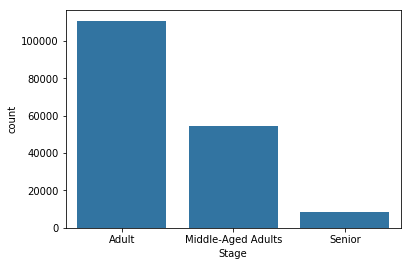

In [294]:
sns.countplot(data=df,x='Stage',color=sns.color_palette()[0])

### Here We can see that younger people tend to take bikes more than older people 

### Question 3 : is there gender differences on who prefer to take a bike

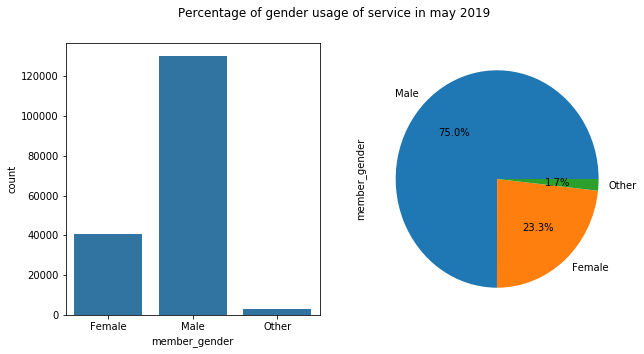

In [324]:
#plot in pie and bar chart for gender percentage
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='member_gender',color=sns.color_palette()[0])
plt.subplot(1,2,2)
df['member_gender'].value_counts().plot.pie(autopct='%0.1f%%')
plt.suptitle('Percentage of gender usage of service in may 2019 ')
plt.show()

### As we can see that more males prefer to ride bike than female and this finding correspond with a study back in 2012 which found out that male cycle more than female 
#### url : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3503594/

## Bivariate Exploration 

In [296]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Stage
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No,Adult
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No,Adult
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No,Adult
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No,Adult
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No,Middle-Aged Adults


### Question 4 : At what time in a day that people take bike more time renting a bike?

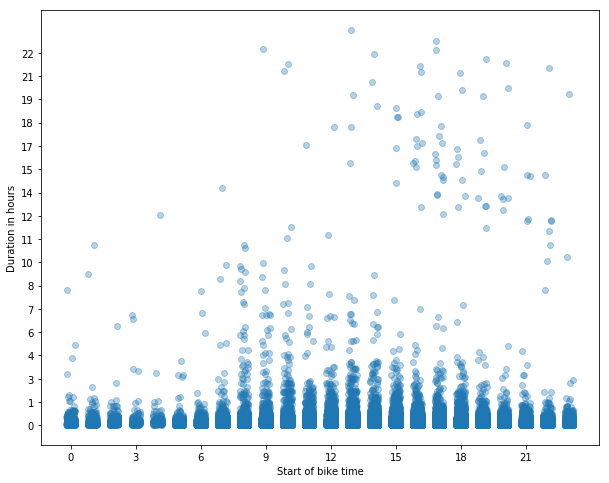

In [297]:
#plt.scatter(x=df.start_time.dt.hour,y=df['duration_sec'],)
#plt.subplot(1,2,1)
plt.figure(figsize=(10,8))
sns.regplot(data=df,x=df.start_time.dt.hour,y='duration_sec',x_jitter = 0.2, y_jitter = 0.2,scatter_kws = {'alpha' : 1/3},fit_reg=False)
plt.xticks([0,3,6,9,12,15,18,21])
sec =[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000] 
hour = []
for x in sec :
    hour.append(round(x/(60*60)))
plt.yticks(sec,hour)
plt.xlabel('Start of bike time')
plt.ylabel('Duration in hours')
plt.show()

### What we see above is that most rides throught the day takes less than hour but from 8 am to 9 pm there is a large amount of people can take more than hour for biking.
### and there is some outliers that people takes more than 8 hours for riding bikes

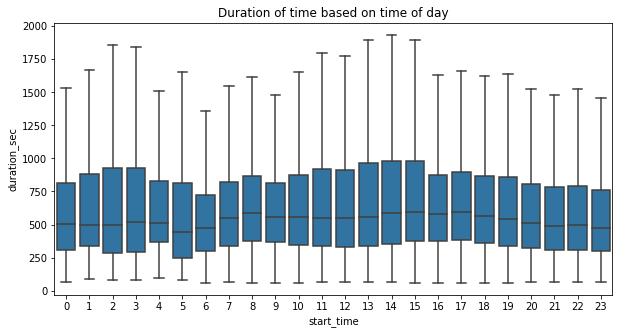

In [298]:
#
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df.start_time.dt.hour,y='duration_sec',showfliers=False,color=sns.color_palette()[0])
plt.title('Duration of time based on time of day')
plt.show()

### it seems that the time of day doesn't make difference on how much people take a ride with average 8 min

In [299]:
#Make category type
age_category = ['Adult', 'Middle-Aged Adults','Senior']
categories = pd.api.types.CategoricalDtype(ordered=True,categories=age_category)

In [300]:
df['Stage']= df.Stage.astype(categories)

In [301]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Stage
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No,Adult
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No,Adult
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No,Adult
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No,Adult
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No,Middle-Aged Adults


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173679 entries, 0 to 182162
Data columns (total 17 columns):
duration_sec               173679 non-null int64
start_time                 173679 non-null datetime64[ns]
end_time                   173679 non-null datetime64[ns]
start_station_id           173679 non-null object
start_station_name         173679 non-null object
start_station_latitude     173679 non-null float64
start_station_longitude    173679 non-null float64
end_station_id             173679 non-null object
end_station_name           173679 non-null object
end_station_latitude       173679 non-null float64
end_station_longitude      173679 non-null float64
bike_id                    173679 non-null object
user_type                  173679 non-null object
member_birth_year          173679 non-null object
member_gender              173679 non-null object
bike_share_for_all_trip    173679 non-null object
Stage                      173679 non-null category
dtypes: category(1

In [303]:
#group by stage and take the average
df.groupby('Stage').mean().reset_index()

,Stage,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,Adult,747.346622,37.756220,-122.336869,37.756339,-122.335988
1,Middle-Aged Adults,752.565221,37.775717,-122.361589,37.775965,-122.360736
2,Senior,800.459370,37.770997,-122.352270,37.771370,-122.351865


In [304]:
Stage_plot = df.groupby('Stage').mean().reset_index()

### Question 5 : does age affect how much time take a bike for a ride?

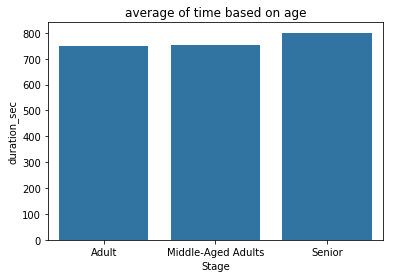

In [305]:
#plot mean duration based on age
color = sns.color_palette()[0]
sns.barplot(data=Stage_plot,x='Stage',y='duration_sec',color=color)
plt.title("average of time based on age")
plt.show()

### AS we can see age doesn't make diffrence how long people take ride on bike

In [306]:
#take user type and take the average
type_user = df.groupby('user_type').mean().reset_index()

### Question 6 : Does type of the user make a diffrence on how long they take a ride in a bike ?

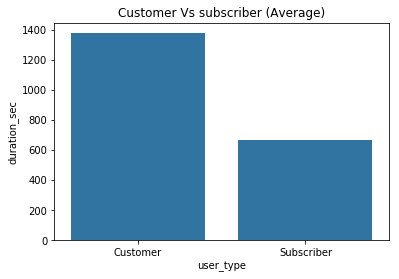

In [307]:
#plot customer vs subscriber mean
sns.barplot(data=type_user,x='user_type',y='duration_sec',color=color)
plt.title('Customer Vs subscriber (Average)')
plt.show()

### Here we can see customer take longer ride on bike with double the amount

In [308]:
#type_user.head()

### Question 7 : is there a diffrence on how long a user take a ride depend on a day?

In [309]:
#group based on week day and take the average 
day_plot = df.groupby(df.start_time.dt.dayofweek).mean().reset_index()

In [310]:
day_plot

,start_time,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,0,747.611346,37.763496,-122.346425,37.763535,-122.345602
1,1,705.350303,37.767193,-122.351020,37.767138,-122.350175
2,2,708.182198,37.764816,-122.348986,37.765087,-122.347936
3,3,704.338129,37.763551,-122.346779,37.763757,-122.345827
4,4,739.225759,37.764059,-122.346132,37.764345,-122.345193
5,5,949.431087,37.753776,-122.328025,37.754163,-122.327766
6,6,946.982760,37.753105,-122.331998,37.753137,-122.331575


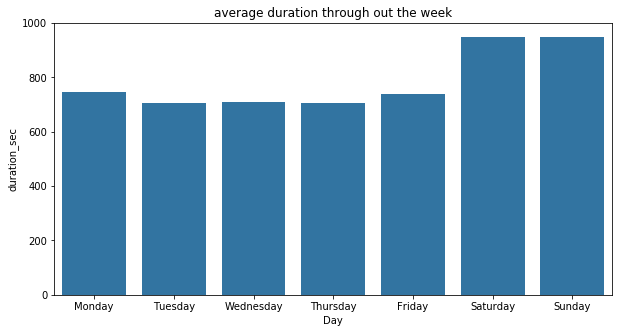

In [311]:
#plot duration mean throught the week
plt.figure(figsize=(10,5))
sns.barplot(data=day_plot,x='start_time',y='duration_sec',color=color)
plt.yticks([0,200,400,600,800,1000])
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day')
plt.title('average duration through out the week')
plt.show()

### What we see is that average of time people take for riding bike is consistence through out the week expect in the weekends people takes longer ride 

In [312]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Stage
0,48877,2019-05-31 20:34:56.811,2019-06-01 10:09:34.796,321,5th St at Folsom,37.780146,-122.403071,60,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990,Female,No,Adult
1,47050,2019-05-31 19:43:56.196,2019-06-01 08:48:06.919,246,Berkeley Civic Center,37.869060,-122.270556,266,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994,Male,No,Adult
2,5912,2019-05-31 23:54:24.089,2019-06-01 01:32:56.982,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988,Male,No,Adult
3,2629,2019-05-31 23:59:57.449,2019-06-01 00:43:46.874,186,Lakeside Dr at 14th St,37.801319,-122.262642,186,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998,Male,No,Adult
4,4235,2019-05-31 23:05:48.932,2019-06-01 00:16:24.457,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,368,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967,Male,No,Middle-Aged Adults


In [313]:
#sns.boxplot(data='station',x='start_station_name',y='duration_sec')

## Multivarte Exploration 

### Question 8 : diffrence between a female and male user and how much time they take for a ride on a bike

In [314]:
#group by 'user_type','member_gender' and take the average
typeXgender = df.groupby(['user_type','member_gender']).mean().reset_index()

In [315]:
typeXgender.head()

,user_type,member_gender,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,Customer,Female,1626.554941,37.775306,-122.356985,37.775819,-122.357179
1,Customer,Male,1260.360956,37.777643,-122.366818,37.778288,-122.366276
2,Customer,Other,1412.747899,37.783121,-122.362558,37.782815,-122.362274
3,Subscriber,Female,737.155435,37.775011,-122.348925,37.775251,-122.347811
4,Subscriber,Male,650.168203,37.756371,-122.340909,37.756451,-122.340052


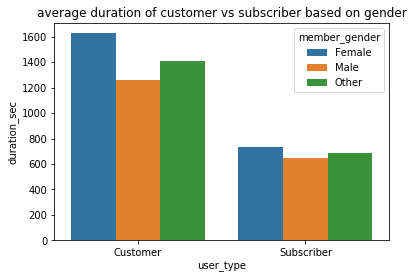

In [316]:
# code barplot showing average duration of customer vs subscriber and gender
sns.barplot(data=typeXgender,x='user_type',y='duration_sec',hue='member_gender')
plt.title('average duration of customer vs subscriber based on gender')
plt.show()

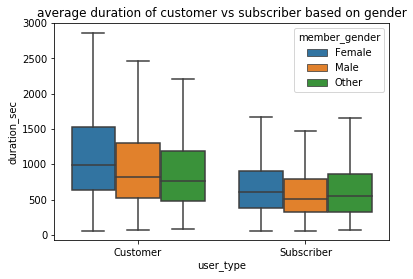

In [317]:
# code barplot showing average duration of customer vs subscriber and gender
sns.boxplot(data=df,x='user_type',y='duration_sec',hue='member_gender',showfliers=False)
plt.title('average duration of customer vs subscriber based on gender')
plt.show()

### Here we can see that female customer takes longer rides than male while if subscriber female there is no significant time diffrence between them 

In [318]:
#new column for hour
df['hour'] = df.start_time.dt.hour

In [319]:
#new column for day
df['day'] = df.start_time.dt.weekday

In [325]:
#group by hour and day
sumHourDay = df.groupby(['hour','day']).sum().reset_index()

In [326]:
sumHourDay.head()

,hour,day,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,0,0,84603,3847.850097,-12472.760463,3847.782640,-12472.858188
1,0,1,42534,2528.564371,-8192.673801,2528.573682,-8192.618326
2,0,2,97252,5093.021752,-16509.338732,5093.034567,-16509.695407
3,0,3,146180,5545.637481,-17977.178250,5545.375135,-17977.406619
4,0,4,124118,6526.311546,-21156.305697,6525.978892,-21156.642535


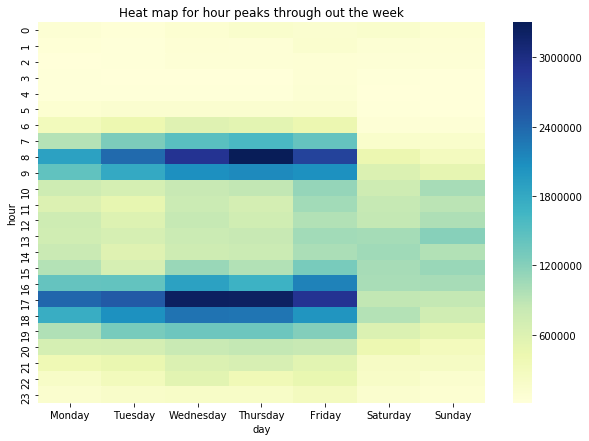

In [327]:
#plot for total duration usage 
plt.figure(figsize=(10,7))
sns.heatmap(sumHourDay.pivot('hour','day','duration_sec'), cmap = 'YlGnBu',xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Heat map for hour peaks through out the week')
plt.show()

### What we see here is that usage of bikes peaks during 8 am and 5 pm and especially in thursday and it is consistent with our previous findings

In [323]:
#save the dataset into csv for explantory exploration
df.to_csv('Cleaned_data.csv',index=False)